In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

In [145]:
lambda1 = 1

# Parameters
arrival_times = [ 0, 3.5 ,  0.1, 0.55, 0.3 ,  0.55,  0.95 ,  1.35,  2.75,  4  ,  5.5 ,  8.5 , 10.5 , 11.25, 12.85]
activation_times = [0.3, 0.2, 0.6, 0.4, 2, 0.75, 1.75, 0.35, 1.85, 2.5, 1.5, 1.5, 1, 1.80]
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

vertices_coord = [1,2,3, 8,9,10, 15,16,17, 22,23,24]
events = [[23,24], [22,23], [22,24], [1,3], [15,16], [1,2], [2,9], [10, 23], [15,17], [8,9], [22,24], [9,10], [1,2], [16,17]]

In [146]:
# # Create the plot
# plt.figure(figsize=(8, 4))

# # Plot vertical dashed lines, labels, and shaded areas for t1, t2, etc.
# for i, t in enumerate(arrival_times[1:]):
#     # First vertical dashed line (start point)
#     plt.text(t, -0.5, f's{i+1}', color='black', ha='center', va='bottom', fontsize=10)
    
#     # Second vertical dashed line (end point)
#     end_time = t + activation_times[i]
#     plt.text(end_time, -0.5, f'e{i+1}', color='black', ha='center', va='bottom', fontsize=10)
    
#     # Shaded area between the two lines
#     plt.fill_betweenx(events[i], t, end_time, color=colors[i], alpha=0.3)

# # Adding Nodes

# for i in range(1,7):
#     plt.text(0.15, i, f'v{7-i}', color='black', ha='center', va='bottom', fontsize=10)
    
# # Formatting the plot
# plt.title('Resulting Dynamic Network')
# plt.xticks([])  # Remove default ticks on x-axis
# plt.yticks([])  # Remove y-axis ticks
# plt.xlim(0, arrival_times[-1] + 2 * activation_times[-1])
# plt.ylim(0, len(events)+2)
# plt.box(False)
# plt.tight_layout()

# # Show the plot
plt.show()

/tmp/ipykernel_3938073/3822865892.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


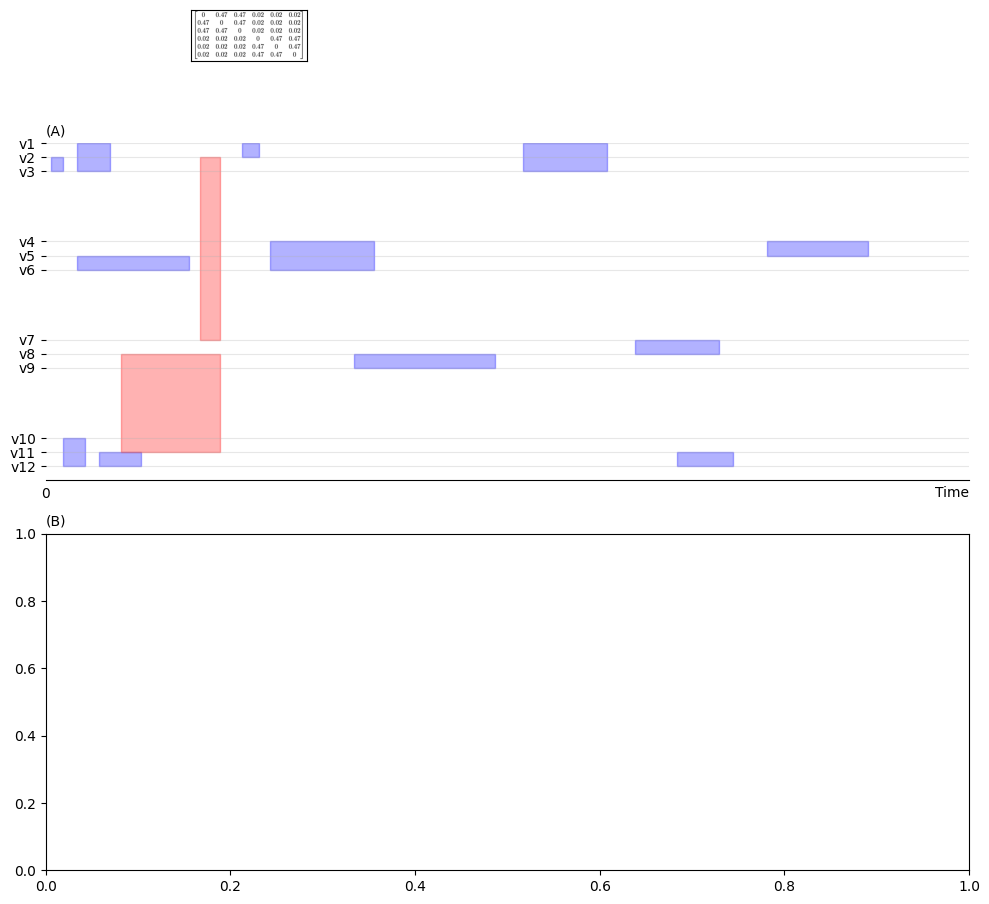

In [147]:
# Create the 3x1 subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))


# Third plot: Resulting Dynamic Network
for i, t in enumerate(arrival_times[1:]):
    end_time = t + activation_times[i]
    #axs[0].text(t, -0.75, f's{i+1}', color='black', ha='center', va='bottom', fontsize=10)
    #axs[0].text(end_time, -0.75, f'e{i+1}', color='black', ha='center', va='bottom', fontsize=10)
    axs[0].fill_betweenx(events[i], t, end_time, color=colors[i], alpha=0.3)

axs[0].text(0, -1.5, 0, color='black', ha='center', va='bottom', fontsize=10)
axs[0].set_xticks([])
axs[0].set_xlabel('Time', loc='right')

vertices = []
for i in range(1, 13):
    #axs[2].text(0.15, i, f'v{7-i}', color='black', ha='center', va='bottom', fontsize=10)
    vertices.append(f'v{13-i}')
axs[0].set_yticks(vertices_coord)
axs[0].set_yticklabels(vertices, minor=False, rotation=0)

axs[0].set_xlim(0, arrival_times[-1] + 2 * activation_times[-1])
axs[0].set_ylim(0, max(vertices_coord))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].grid(axis='y', alpha=0.3)


positions = [0.15] # Horizontal position for the inset
img_matrix= mpimg.imread('/home/b/skoove/Desktop/evolving_SBM/Matrix2.png')
for pos in positions:
    inset_ax = inset_axes(axs[0], width="50%", height="50%", loc="lower left", 
                                    bbox_to_anchor=(pos, 1.05, 0.25, 1), bbox_transform=axs[0].transAxes)
    inset_ax.imshow(img_matrix, aspect='equal')
    #inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

list_titles = ['(A)', '(B)', '(C)']
for j, ax in enumerate(axs):
    ax.set_title(list_titles[j], loc='left', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_description_fig.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()
